In [85]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 500)

In [2]:
df = pd.read_pickle('data/df_final.pkl')
df['num_of_awards']=[len(i) for i in df['honor']]
df['owned'] = df['owned'].astype(float)
df['avg_rating'] = df['avg_rating'].astype(float)
df['log_owned']=np.log(df['owned']+.00001)

# mechanics

In [3]:
mechanics = pd.get_dummies(df.mech_list.apply(pd.Series).stack(), prefix='(MECHANIC)', prefix_sep=' ').sum(level=0)
mechanics

,(MECHANIC) Acting,(MECHANIC) Action Drafting,(MECHANIC) Action Points,(MECHANIC) Action Queue,(MECHANIC) Action Retrieval,(MECHANIC) Action Timer,(MECHANIC) Action/Event,(MECHANIC) Advantage Token,(MECHANIC) Alliances,(MECHANIC) Area Majority / Influence,...,(MECHANIC) Turn Order: Stat-Based,(MECHANIC) Variable Phase Order,(MECHANIC) Variable Player Powers,(MECHANIC) Variable Setup,(MECHANIC) Victory Points as a Resource,(MECHANIC) Voting,(MECHANIC) Worker Placement,(MECHANIC) Worker Placement with Dice Workers,"(MECHANIC) Worker Placement, Different Worker Types",(MECHANIC) Zone of Control
0,0,0,0,1,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,1,...,0,1,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120826,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
120827,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
120829,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
120830,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [471]:
mech_df = df[['owned','log_owned','avg_rating']].merge(mechanics, left_index=True, right_index=True)
fam_df.shape

(74662, 3798)

In [469]:
mechanics.sum().sort_values(ascending=False).head(20)

Dice Rolling                     31314
Hand Management                  16871
Roll / Spin and Move             15524
Variable Player Powers           12846
Set Collection                   12658
Card Drafting                     8854
Hexagon Grid                      8144
Simulation                        8080
Cooperative Game                  7823
Modular Board                     7087
Tile Placement                    6611
Action Points                     5862
Grid Movement                     5624
Area Majority / Influence         5286
Simultaneous Action Selection     5110
Point to Point Movement           5076
Memory                            5000
Auction/Bidding                   4398
Area Movement                     4361
Trading                           3915
dtype: int64

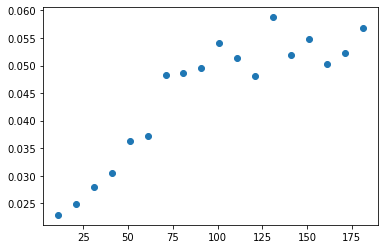

In [444]:
# multi cross-val
XX = []
yy = range(1,182,10)
for i in yy:
    top = list(mechanics.sum().sort_values(ascending=False).head(i).index)

    X = mech_df[top]
    y = mech_df['owned']
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2)
    
    # CROSS VALIDATION
    lr = LinearRegression() 

    #compute cross-validation score accuracy across 10 folds
    cross_val_scores = cross_val_score(lr,X_train,y_train,cv=10)

    XX.append(np.mean(cross_val_scores))

# Plot the relationship between number of mechanics in the model vs CV_score
    
plt_df = pd.DataFrame({'X':XX, 'y':yy})
plt_df = plt_df[plt_df.X > 0]
plt.scatter(plt_df.y, plt_df.X)

# awards

In [4]:
awards = pd.get_dummies(df.honor.apply(pd.Series).stack()).sum(level=0)
awards

,1974 Charles S. Roberts Best Amateur Game Nominee,1974 Charles S. Roberts Best Amateur Game Winner,1974 Charles S. Roberts Best Professional Game Nominee,1974 Charles S. Roberts Best Professional Game Winner,1975 Charles S. Roberrts Best Amateur Game Nominee,1975 Charles S. Roberts Best Amateur Game Winner,1975 Charles S. Roberts Best Professional Game Nominee,1975 Charles S. Roberts Best Professional Game Winner,1976 Charles S. Roberts Best Graphics and Physical Systems Nominee,1976 Charles S. Roberts Best Graphics and Physical Systems Winner,...,2020 Årets Spil Best Adult Game Winner,2020 Årets Spil Best Children's Game Nominee,2020 Årets Spil Best Children's Game Winner,2020 Årets Spil Best Family Game Nominee,2020 Årets Spil Best Family Game Winner,2020 Årets Spil Best New Game Winner,2020/Spring Parents' Choice Fun Stuff Award Winner,2020/Spring Parents' Choice Gold Award Winner,2020/Spring Parents' Choice Recommended,2020/Spring Parents' Choice Silver Honor Winner
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120642,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
120643,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
120644,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
120646,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [79]:
grouped = awards.groupby(lambda col: '(AWARD)' + col[5:].rsplit(' ', 1)[0].lower(), axis=1)
awards_grouped = grouped.sum()

In [75]:
awards_grouped.loc[24]['(AWARD)hra roku nominee']

2

In [62]:
awards_grouped[awards_grouped['(AWARD)hra roku']==3]

,(AWARD) 5 seasons best international kids game,(AWARD) as d'or - jeu de l'année enfant,(AWARD) boardgames australia awards best australian game,(AWARD) deutscher spiele preis best family/adult game 3rd,(AWARD) hungarian board game award,(AWARD) juego del año tico,"(AWARD) kinderspielexperten ""8-to-13-year-olds""",(AWARD) spiel der spiele griffin scroll,(AWARD)2010 premio jugamos tod@s,(AWARD)2012 boardgames australia awards best australian game,...,(AWARD)årets spel best family game,(AWARD)årets spel most innovative game,(AWARD)årets spil best adult game,(AWARD)årets spil best children's game,(AWARD)årets spil best family game,(AWARD)årets spil best new game,(AWARD)årets spill best children's game,(AWARD)årets spill best family game,(AWARD)årets spill best party game,(AWARD)årets spill best strategy game
24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
410,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
awards_grouped.shape

(5263, 628)

In [36]:
# With winners/nominee/recommend seperation
awards_grouped.shape

(5263, 882)

In [38]:
awards_grouped.columns[1]

'(AWARD)  5 seasons best international kids game winner'

In [39]:
awards_grouped.max(axis=0)[awards_grouped.max(axis=0)==2]

(AWARD) charles s. roberts best fantasy or science-fiction board game winner    2
(AWARD) charles s. roberts best pre-twentieth century game winner               2
(AWARD) charles s. roberts best twentieth century game winner                   2
(AWARD) international gamers awards - general strategy; two-players             2
(AWARD) lucca games best collectible game                                       2
(AWARD) origins awards best graphic presentation of a card game winner          2
dtype: uint8

In [63]:
awards_grouped.sum().sort_values(ascending=False).head(10)

(AWARD)spiel des jahres                          458
(AWARD)fairplay à la carte                       291
(AWARD)meeples' choice                           284
(AWARD)tric trac                                 242
(AWARD)golden geek best 2-player board game      200
(AWARD)golden geek best family board game        199
(AWARD)golden geek best wargame                  195
(AWARD)kinderspielexperten "5-to-9-year-olds"    192
(AWARD)golden geek best card game                183
(AWARD)juego del año                             178
dtype: int64

In [94]:
awards_df = df[['owned','log_owned','avg_rating','names','num_of_awards']].merge(awards_grouped, left_index=True, right_index=True)

In [363]:
awards_df[awards_df.names=='Pictures']['spiel des jahres']

2891    1
Name: spiel des jahres, dtype: uint8

In [448]:
awards_corr = awards_df.corr()
awards_corr.sort_values('owned', ascending=False, axis=1).columns[2:]

Index(['hra roku', 'meeples' choice', 'juego del año',
       'golden geek board game of the year',
       'golden geek best family board game',
       'jocul anului în românia best game in romanian',
       'japan boardgame prize voters' selection',
       'golden geek most innovative board game', 'tric trac',
       'deutscher spiele preis best family/adult game',
       ...
       'charles s. roberts best wargaming graphics',
       'charles s. roberts best world war ii board game',
       'kinderspiel des jahres', 'japan boardgame prize best childgame',
       'charles s. roberts best magazine-published boardgame',
       'deutscher lernspielpreis "3 years and up"',
       'spiel der spiele hit für kinder',
       'charles s. roberts best dtp-produced boardgame',
       'spiel des jahres kinderspiel',
       'kinderspielexperten "5-to-9-year-olds"'],
      dtype='object', length=629)

In [430]:
XX = []
yy = range(1,600,10)
for i in yy:
    pop_awards = list(awards_grouped.sum().sort_values(ascending=False).head(i).index)

    X = awards_df[pop_awards]
    y = awards_df['owned']

    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2)

    lr = LinearRegression()
    lr.fit(X_train, y_train)
    XX.append(lr.score(X_test, y_test))

In [369]:
# Single cross-val

pop_awards = list(awards_grouped.sum().sort_values(ascending=False).head(50).index)

X = awards_df[pop_awards]
y = awards_df['owned']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2)

# CROSS VALIDATION
lr = LinearRegression() 

#compute cross-validation score accuracy across 10 folds
cross_val_scores = cross_val_score(lr,X_train,y_train,cv=10)

np.mean(cross_val_scores)

0.47973417046127986

In [461]:
i=3
print(type(list(awards_grouped.sum().sort_values(ascending=False).head(i).index)))
type(list(awards_corr.sort_values('owned', ascending=False, axis=1).columns[2:i]))
type(list(awards_grouped.sum().sort_values(ascending=False).head(i).index))

<class 'list'>


list

In [463]:
# multi cross-val
XX = []
yy = range(1,60,2)
for i in yy:
    pop_awards = list(awards_grouped.sum().sort_values(ascending=False).head(i).index)
#     pop_awards = list(awards_corr.sort_values('owned', ascending=False, axis=1).columns[2:i])
    
    X = awards_df[pop_awards]
    y = awards_df['owned']
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2)
    
    # CROSS VALIDATION
    lr = LinearRegression() 

    #compute cross-validation score accuracy across 10 folds
    cross_val_scores = cross_val_score(lr,X_train,y_train,cv=10)

    XX.append(np.mean(cross_val_scores))

In [437]:
plt_df = pd.DataFrame({'X':XX, 'y':yy})
plt_df = plt_df[plt_df.X > 0]

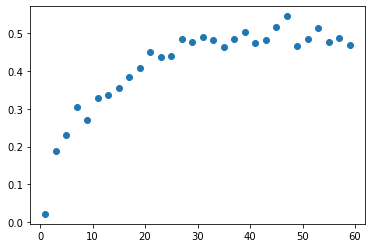

In [438]:
plt.scatter(plt_df.y, plt_df.X)

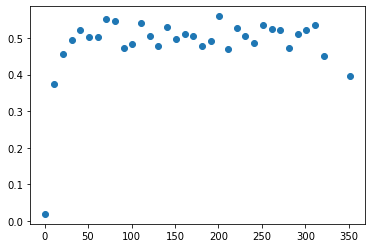

In [435]:
plt.scatter(plt_df.y, plt_df.X)

In [278]:
# CROSS VALIDATION
lr = LinearRegression() 

#compute cross-validation score accuracy across 10 folds
cross_val_scores = cross_val_score(lr,X_train,y_train,cv=10)

print("Mean cv-accuracy:",np.mean(cross_val_scores))

Mean cv-accuracy: 0.5188289428921339


In [276]:
print("10-fold accuracies:\n",cross_val_scores)
print("Std of cv-accuracy:",np.std(cross_val_scores))

10-fold accuracies:
 [0.46334662 0.53855937 0.68065343 0.59871392 0.61863418 0.23145002
 0.51461519 0.38989672 0.52840321 0.62401677]
Std of cv-accuracy: 0.1250525905645537


In [ ]:
# #train/test split with 10% of data in each split:
# for i in range(10):
#     X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.1)
#     lr_fit = lr.fit(X_train,y_train)
#     # print("Accuracy for split ",i,": ",metrics.accuracy_score(y_test,lr_fit.predict(X_test)))

# categories

In [8]:
categories = pd.get_dummies(df.categ_list.apply(pd.Series).stack(), prefix='(THEME)', prefix_sep=' ').sum(level=0)
categories 

,(THEME) Abstract Strategy,(THEME) Action / Dexterity,(THEME) Adventure,(THEME) Age of Reason,(THEME) American Civil War,(THEME) American Indian Wars,(THEME) American Revolutionary War,(THEME) American West,(THEME) Ancient,(THEME) Animals,...,(THEME) Transportation,(THEME) Travel,(THEME) Trivia,(THEME) Video Game Theme,(THEME) Vietnam War,(THEME) Wargame,(THEME) Word Game,(THEME) World War I,(THEME) World War II,(THEME) Zombies
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120827,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
120828,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
120829,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
120830,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [440]:
cat_df = df[['owned','log_owned','avg_rating']].merge(categories, left_index=True, right_index=True)

In [482]:
categories.sum().sort_values(ascending=False).head(20)

Card Game                    29648
Expansion for Base-game      21071
Wargame                      19352
Children's Game              13407
Fantasy                      13183
Miniatures                   12091
Dice                         10589
Party Game                    9717
Science Fiction               9385
Abstract Strategy             8922
Fighting                      8856
Educational                   7898
Economic                      6960
Movies / TV / Radio theme     6756
Trivia                        6437
Print & Play                  6414
World War II                  6067
Animals                       6056
Humor                         5758
Action / Dexterity            5637
dtype: int64

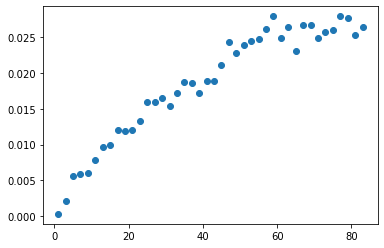

In [508]:
# multi cross-val
XX = []
yy = range(1,84,2)
for i in yy:
    top = list(categories.sum().sort_values(ascending=False).head(i).index)

    X = cat_df[top]
    y = cat_df['owned']
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2)
    
    # CROSS VALIDATION
    lr = LinearRegression() 

    #compute cross-validation score accuracy across 10 folds
    cross_val_scores = cross_val_score(lr,X_train,y_train,cv=10)

    XX.append(np.mean(cross_val_scores))

# Plot the relationship between number of mechanics in the model vs CV_score
    
plt_df = pd.DataFrame({'X':XX, 'y':yy})
plt_df = plt_df[plt_df.X > 0]
plt.scatter(plt_df.y, plt_df.X)

# family_subgroup

In [9]:
family_subgroup = pd.get_dummies(df.family_subgroup.apply(pd.Series).stack(), prefix='(SUBGROUP)', prefix_sep=' ').sum(level=0)
family_subgroup

,(SUBGROUP) Admin: Better Description Needed!,(SUBGROUP) Admin: Book entries that should be split,(SUBGROUP) Admin: Cancelled Games,(SUBGROUP) Admin: Game System Entries,(SUBGROUP) Admin: Miscellaneous Placeholder,(SUBGROUP) Admin: Outside the Scope of BGG,(SUBGROUP) Admin: Test Family for revision,(SUBGROUP) Admin: Unreleased Games,(SUBGROUP) Ancient: Babylon,(SUBGROUP) Ancient: Greece,...,(SUBGROUP) Video Game Theme: SEGA,(SUBGROUP) Video Game Theme: Sonic the Hedgehog,(SUBGROUP) Video Game Theme: Super Mario Bros.,(SUBGROUP) Video Game Theme: Tetris,"(SUBGROUP) Warhammer 40,000: Imperial Armour Sourcebooks",(SUBGROUP) Webcomics: Dork Tower,(SUBGROUP) Webcomics: Penny Arcade,(SUBGROUP) Word Games: First Letter Given,(SUBGROUP) Word Games: Guess the Word,(SUBGROUP) Word Games: Spelling / Letters
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120823,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
120827,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
120828,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
120830,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [86]:
family_subgroup.sum().sort_values(ascending=False).head(200)

(SUBGROUP) Crowdfunding: Kickstarter                                         10585
(SUBGROUP) Admin: Unreleased Games                                            4918
(SUBGROUP) Players: Games with Solitaire Rules                                2852
(SUBGROUP) Admin: Better Description Needed!                                  2760
(SUBGROUP) Misc: Monopoly-Like                                                1713
(SUBGROUP) Players: Two Player Only Games                                     1075
(SUBGROUP) Theme: Food / Cooking                                               980
(SUBGROUP) Components: Miniatures                                              942
(SUBGROUP) Category: Combinatorial                                             938
(SUBGROUP) Country: Germany                                                    908
(SUBGROUP) Sports: Football / Soccer                                           893
(SUBGROUP) Collectible: Collectible Card Games                                 880
(SUB

In [474]:
df.shape

(120832, 43)

In [476]:
fam_df = df[['owned','log_owned']].merge(family_subgroup, left_index=True, right_index=True)
fam_df.shape

(74662, 3797)

In [537]:
# multi cross-val
XX = []
yy = range(1,3000,100)
for i in yy:
    top = list(family_subgroup.sum().sort_values(ascending=False).head(i).index)

    X = fam_df[top]
    y = fam_df['owned']
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2)
    
    # CROSS VALIDATION
    lr = LinearRegression() 

    #compute cross-validation score accuracy across 10 folds
    cross_val_scores = cross_val_score(lr,X_train,y_train,cv=10)

    XX.append(np.mean(cross_val_scores))

# Plot the relationship between number of mechanics in the model vs CV_score
    
plt_df = pd.DataFrame({'X':XX, 'y':yy})
plt_df = plt_df[plt_df.X > 0]
plt.scatter(plt_df.y, plt_df.X)

KeyboardInterrupt: 

# sub_domain

In [10]:
sub_domain = pd.get_dummies(df.sub_domain.apply(pd.Series).stack(), prefix='(DOMAIN)', prefix_sep=' ').sum(level=0)
sub_domain 

,(DOMAIN) Abstract Games,(DOMAIN) Children's Games,(DOMAIN) Customizable Games,(DOMAIN) Family Games,(DOMAIN) Party Games,(DOMAIN) Strategy Games,(DOMAIN) Thematic Games,(DOMAIN) Wargames
0,0,0,0,0,0,1,1,0
1,0,0,0,0,0,1,1,0
2,0,0,0,0,0,1,0,0
3,0,0,0,0,0,1,0,0
4,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...
117609,0,0,0,0,0,0,0,1
117637,0,0,0,0,0,0,0,1
117722,0,1,0,0,0,0,0,0
117795,0,0,0,0,0,0,0,1


In [490]:
sub_domain.sum().sort_values(ascending=False)

Wargames              9471
Abstract Games        4628
Children's Games      4000
Strategy Games        2634
Family Games          2348
Thematic Games        1483
Party Games            655
Customizable Games     621
dtype: int64

In [531]:
sub_df = df[['owned','log_owned','avg_rating']].merge(sub_domain, left_index=True, right_index=True)
sub_df.shape

(23930, 11)

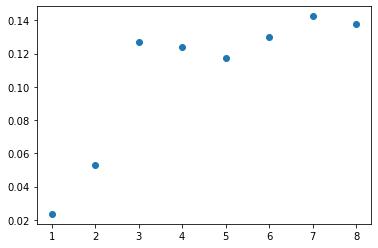

In [536]:
# multi cross-val
XX = []
yy = range(1,9)
for i in yy:
    top = sub_domain.sum().sort_values(ascending=False).head(i).index

    X = sub_df[top]
    y = sub_df['owned']
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2)
    
    # CROSS VALIDATION
    lr = LinearRegression() 

    #compute cross-validation score accuracy across 10 folds
    cross_val_scores = cross_val_score(lr,X_train,y_train,cv=10)

    XX.append(np.mean(cross_val_scores))

# Plot the relationship between number of mechanics in the model vs CV_score
    
plt_df = pd.DataFrame({'X':XX, 'y':yy})
plt_df = plt_df[plt_df.X > 0]
plt.scatter(plt_df.y, plt_df.X)

In [509]:
# try with a seperate arangement to see it's affect on the score

/Users/briantam/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/briantam/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/briantam/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_base.py", line 505, in fit
    X, y = self._validate_data(X, y, accept_sparse=['csr', 'csc', 'coo'],
  File "/Users/briantam/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/base.py", line 432, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/Users/briantam/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py", line 72, in inner_f
    return f(**kwargs)
  File "/U

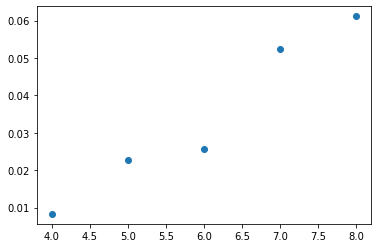

In [506]:
# multi cross-val
XX = []
yy = range(1,9)
for i in yy:
    top = list(sub_domain.sum().sort_values(ascending=False).head(i).index)

    X = sub_df.iloc[:,3:i]
    y = sub_df['owned']
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2)
    
    # CROSS VALIDATION
    lr = LinearRegression() 

    #compute cross-validation score accuracy across 10 folds
    cross_val_scores = cross_val_score(lr,X_train,y_train,cv=10)

    XX.append(np.mean(cross_val_scores))

# Plot the relationship between number of mechanics in the model vs CV_score
    
plt_df = pd.DataFrame({'X':XX, 'y':yy})
plt_df = plt_df[plt_df.X > 0]
plt.scatter(plt_df.y, plt_df.X)

---
# ALL DUMMIES

In [90]:
data_frames = [
    mechanics, 
    awards_grouped, 
    categories,
    family_subgroup[family_subgroup.sum().sort_values(ascending=False).head(200).index], 
    sub_domain]

In [91]:
all_df_concat = pd.concat(data_frames,axis=1)
all_df = df[['owned','log_owned','avg_rating','names']].merge(all_df_concat, left_index=True, right_index=True, how = 'left')
all_df = all_df.fillna(0)

In [92]:
import pickle 
all_df.to_pickle('df_dummies.pkl')

---
# Appendix

In [43]:
data_frames = [
    mechanics[mechanics.sum().sort_values(ascending=False).head(182).index], 
    awards_grouped[awards_grouped.sum().sort_values(ascending=False).head(100).index], 
    categories[categories.sum().sort_values(ascending=False).head(84).index],
    family_subgroup[family_subgroup.sum().sort_values(ascending=False).head(200).index], 
    sub_domain[sub_domain.sum().sort_values(ascending=False).head(8).index], 
               ]

<AxesSubplot:xlabel='(AWARD)golden geek best board game expansion', ylabel='owned'>

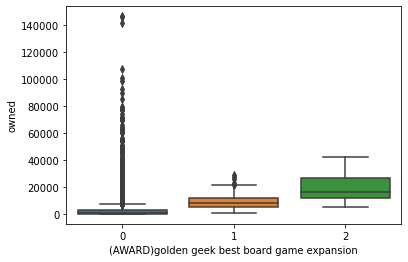

In [102]:
import seaborn as sns
sns.boxplot(data=awards_df, x='(AWARD)golden geek best board game expansion', y='owned')

<AxesSubplot:xlabel='(AWARD)spiel des jahres', ylabel='owned'>

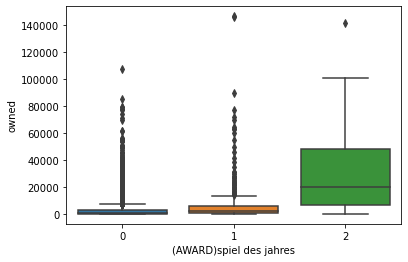

In [101]:
import seaborn as sns
sns.boxplot(data=awards_df, x='(AWARD)spiel des jahres', y='owned')

In [96]:
awards_df[awards_df['(AWARD)golden geek best board game expansion'] == 1]

,owned,log_owned,avg_rating,names,num_of_awards,(AWARD) 5 seasons best international kids game,(AWARD) as d'or - jeu de l'année enfant,(AWARD) boardgames australia awards best australian game,(AWARD) deutscher spiele preis best family/adult game 3rd,(AWARD) hungarian board game award,...,(AWARD)årets spel best family game,(AWARD)årets spel most innovative game,(AWARD)årets spil best adult game,(AWARD)årets spil best children's game,(AWARD)årets spil best family game,(AWARD)årets spil best new game,(AWARD)årets spill best children's game,(AWARD)årets spill best family game,(AWARD)årets spill best party game,(AWARD)årets spill best strategy game
155,6523.0,8.783090,8.44,Aeon's End: War Eternal,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
206,21781.0,9.988793,7.46,Dixit: Odyssey,7,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
208,16853.0,9.732284,7.67,Dead of Winter: The Long Night,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
650,11497.0,9.349841,7.32,Smash Up: Science Fiction Double Feature,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
679,5206.0,8.557567,7.31,Ascension: Storm of Souls,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
722,4988.0,8.514790,7.30,Ascension: Return of the Fallen,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
746,4242.0,8.352790,7.34,Thunderstone: Dragonspire,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
914,3638.0,8.199189,7.48,Trains: Rising Sun,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1158,6232.0,8.737453,7.26,One Deck Dungeon: Forest of Shadows,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38928,4704.0,8.456168,7.99,Descent: The Road to Legend,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
